In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [12]:
X = 6 * np.random.rand(500) - 3
Y = 0.8 * X**2 - 0.5*X + 3 + np.random.randn(500)

<function matplotlib.pyplot.show(close=None, block=None)>

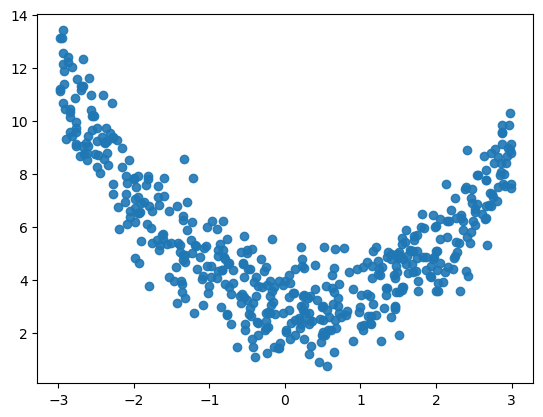

In [13]:
plt.scatter(X,Y, alpha = 0.9)
plt.show

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_train = x_train.reshape(-1,1)

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
x_test = x_test.reshape(-1,1)

In [87]:
y_pred = lr.predict(x_test)

In [88]:
r2_score(y_test, y_pred)

0.04537994011766455

In [72]:
pf = PolynomialFeatures(degree = 2)

In [73]:
x_train_trf = pf.fit_transform(x_train)
x_test_trf = pf.transform(x_test.reshape(-1,1))

In [74]:
x_train_trf[0]

array([1.        , 1.60136707, 2.56437651])

In [112]:
R = Ridge(alpha = 0)
R.fit(x_train_trf, y_train)

,alpha,0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [113]:
y_pred_trf = R.predict(x_test_trf)

In [114]:
r2_score(y_test, y_pred_trf)

0.8549563552640658

In [94]:
x_new = np.linspace(-3,3,500)

In [96]:
x_new_poly = pf.transform(x_new.reshape(-1,1))

In [97]:
y_new = R.predict(x_new_poly)

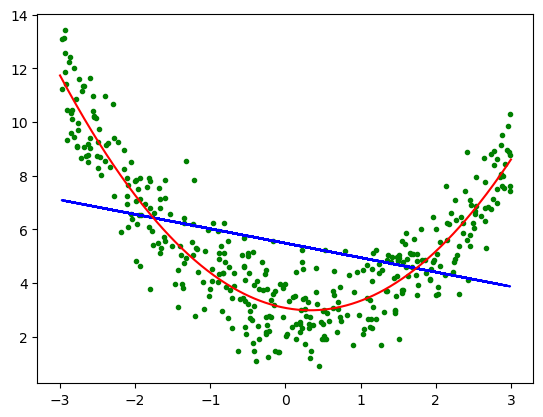

In [98]:
plt.plot(x_train, y_train, 'g.')
plt.plot(x_test, y_pred, 'b-')
plt.plot(x_new, y_new, 'r-')
plt.show()

In [131]:
x = np.random.rand(100)
y = []

In [132]:
for i in x:
    R = Ridge(alpha = i)
    R.fit(x_train_trf, y_train)
    y.append(r2_score(y_test, R.predict(x_test_trf)))

<function matplotlib.pyplot.show(close=None, block=None)>

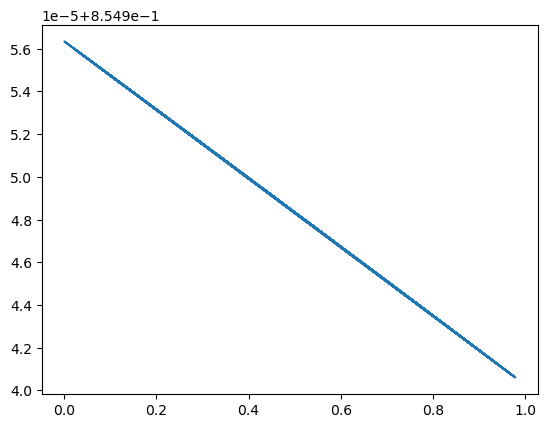

In [133]:
plt.plot(x,y)
plt.show